In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from inference import *
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
%%time
img = cv2.imread('test_data/8006_3_260.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = get_butts(img, 8006)

CPU times: user 106 ms, sys: 23.4 ms, total: 129 ms
Wall time: 105 ms


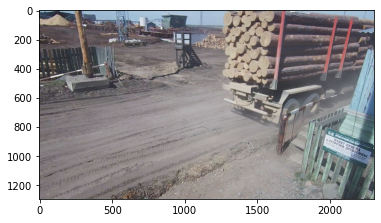

In [14]:
plt.imshow(img)

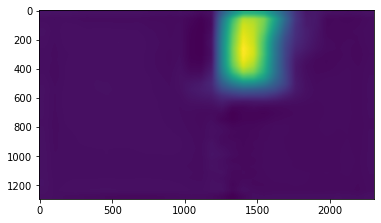

In [15]:
h, w = img.shape[:2]
plt.imshow(cv2.resize(mask, (w,h)))

In [16]:
butts_mask = cv2.resize(mask, (w, h))
butts_mask = (butts_mask > 0).astype('uint8')
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(butts_mask)
x, y, dx, dy, _ = stats[np.argsort(stats[:, -1])][-2]

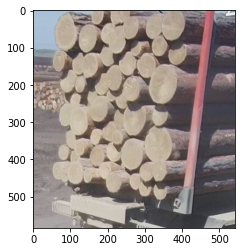

In [17]:
img_butts = img[y:y+dy, x:x+dx]
plt.imshow(img_butts)

In [18]:
mask_butts_dotted = get_butts_dotted(img_butts)

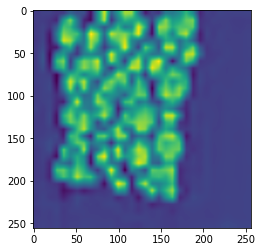

In [19]:
plt.imshow(mask_butts_dotted)

In [20]:
h0, w0 = img_butts.shape[:2]
mask_butts_dotted = cv2.resize(mask_butts_dotted, (w0, h0))
mask_butts_dotted = (mask_butts_dotted > 0).astype('uint8')

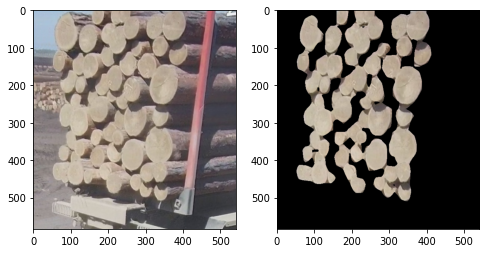

In [21]:
_, ax = plt.subplots(ncols=2, figsize=(8,6))
ax[0].imshow(img_butts)
ax[1].imshow(cv2.bitwise_and(img_butts,img_butts, mask=mask_butts_dotted))